In [26]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot(f, xRange, *args, **kw):
    # abbreviation for plotting functions in certain range
    yRange = np.fromiter(map(f, xRange), np.float)
    plt.plot(xRange, yRange, *args, **kw)

import readdy_learn.generate.generate_tools.kinetic_monte_carlo as kmc

## Two species converting into each other in one box

In [28]:
n_species = 2
n_boxes = 1
species_names = ["A", "B"]
diffusivity_0 = np.array([[0.]])  # species 0
diffusivity_1 = np.array([[0.]])  # species 1
diffusivity = np.array([diffusivity_0, diffusivity_1])
init_state = np.array([[70, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state, species_names=species_names)
system.add_conversion("A", "B", np.array([4.]))
system.add_conversion("B", "A", np.array([0.5]))

In [29]:
system.simulate(300)

[KMC] [2017-10-11 10:33:06] [INFO] Simulate for 300 steps


In [30]:
time_series, times = system.convert_events_to_time_series(n_frames=1000)

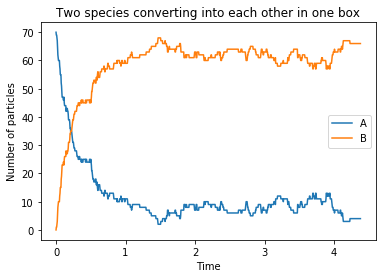

In [31]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Two species converting into each other in one box")
plt.show()

## The same as above but fewer particles

In [32]:
n_species = 2
n_boxes = 1
diffusivity_0 = np.array([[0.]])  # species 0
diffusivity_1 = np.array([[0.]])  # species 1
diffusivity = np.array([diffusivity_0, diffusivity_1])
reactions = [kmc.Conversion(0, 1, np.array([4.]), n_species, n_boxes), kmc.Conversion(1, 0, np.array([0.5]), n_species, n_boxes)]
init_state = np.array([[30, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state, species_names=["A", "B"])
system.add_conversion("A", "B", np.array([4.]))
system.add_conversion("B", "A", np.array([0.5]))

In [33]:
system.simulate(120)

[KMC] [2017-10-11 10:33:39] [INFO] Simulate for 120 steps


In [34]:
time_series, times = system.convert_events_to_time_series(n_frames=10000)

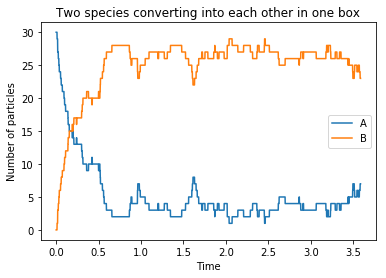

In [35]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Two species converting into each other in one box")
plt.show()

## Two boxes, three species, Fusion and Fission

In [37]:
n_species = 3
n_boxes = 2
diffusivity_0 = np.array([[0., 0.15], [0.15, 0.]])  # species 0
diffusivity_1 = np.array([[0., 0.1], [0.1, 0.]])  # species 1
diffusivity_2 = np.array([[0., 0.05], [0.05, 0.]])  # species 2
diffusivity = np.array([diffusivity_0, diffusivity_1, diffusivity_2])
init_state = np.array([[80, 0, 0], [0, 50, 0]], dtype=np.int)
system = kmc.ReactionDiffusionSystem(diffusivity, n_species, n_boxes, init_state, species_names=["A", "B", "C"])
system.add_fusion("A", "B", "C", np.array([4., 4.]))
system.add_fission("C", "A", "B", np.array([0.5, 0.5]))

In [38]:
system.simulate(1000)

[KMC] [2017-10-11 10:34:15] [INFO] Simulate for 1000 steps


In [39]:
time_series, times = system.convert_events_to_time_series(n_frames=10000)

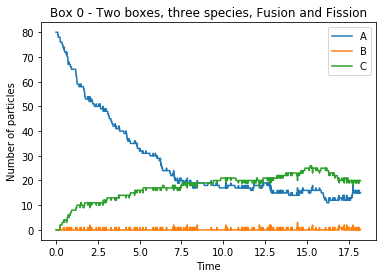

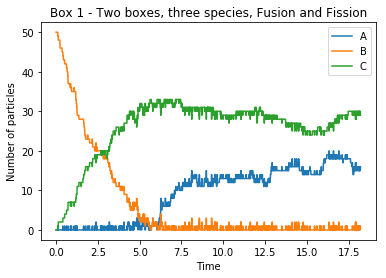

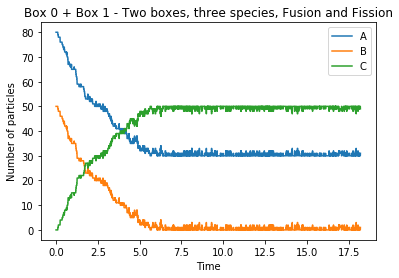

In [40]:
plt.plot(times, time_series[:,0,0], label="A")
plt.plot(times, time_series[:,0,1], label="B")
plt.plot(times, time_series[:,0,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 0 - Two boxes, three species, Fusion and Fission")
plt.show()
plt.plot(times, time_series[:,1,0], label="A")
plt.plot(times, time_series[:,1,1], label="B")
plt.plot(times, time_series[:,1,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 1 - Two boxes, three species, Fusion and Fission")
plt.show()
plt.plot(times, time_series[:,0,0]+time_series[:,1,0], label="A")
plt.plot(times, time_series[:,0,1]+time_series[:,1,1], label="B")
plt.plot(times, time_series[:,0,2]+time_series[:,1,2], label="C")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.legend(loc="best")
plt.title("Box 0 + Box 1 - Two boxes, three species, Fusion and Fission")
plt.show()

### Unimolecular reaction
System is $A\rightarrow B$ with CME rate $\kappa_u$.

In [41]:
n_species = 2
n_boxes = 1
rate = 2.
diffusivity_a = np.array([[0.]])
diffusivity_b = np.array([[0.]])
diffusivity = np.array([diffusivity_a, diffusivity_b])
init_state = np.array([[50, 0]])
system = kmc.ReactionDiffusionSystem(diffusivity, 2, 1, init_state, species_names=["A", "B"])
system.add_conversion("A", "B", np.array([rate]))

In [42]:
system.simulate(1000)

[KMC] [2017-10-11 10:34:42] [INFO] Simulate for 1000 steps


[KMC] [2017-10-11 10:34:42] [INFO] No events possible / system is frustrated, at step 50


In [43]:
traj, times = system.convert_events_to_time_series(n_frames=10000)

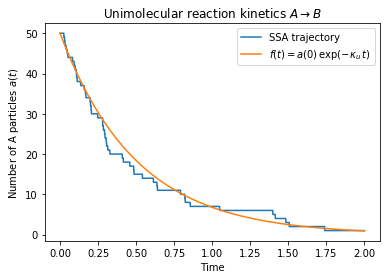

In [44]:
desired_time = 2.0
end_time_step = int(desired_time / (times[-1] / float(len(times)))) if times[-1] > desired_time else len(times)-1
plt.plot(times[:end_time_step], traj[:end_time_step,0,0], label="SSA trajectory")
plot(
    lambda x: init_state[0,0] * np.exp(- rate * x),
    np.linspace(0.,times[end_time_step], 1000),
    label=r"$f(t) = a(0)\,\exp( - \kappa_u\, t)$"
)
plt.ylabel(r"Number of A particles $a(t)$")
plt.xlabel(r"Time")
plt.legend(loc="best")
plt.title(r"Unimolecular reaction kinetics $A\rightarrow B$")
plt.show()

### Bimolecular reaction
System is $A+B\rightarrow C$ with CME rate $\kappa_b$.

In [46]:
n_species = 3
n_boxes = 1
rate = 2.
diffusivity_a = np.array([[0.]])
diffusivity_b = np.array([[0.]])
diffusivity_c = np.array([[0.]])
diffusivity = np.array([diffusivity_a, diffusivity_b, diffusivity_c])
init_state = np.array([[50, 50, 0]])
system = kmc.ReactionDiffusionSystem(diffusivity, 3, 1, init_state, species_names=["A", "B", "C"])
system.add_fusion("A", "B", "C", np.array([rate]))

In [47]:
system.simulate(1000)

[KMC] [2017-10-11 10:35:05] [INFO] Simulate for 1000 steps


[KMC] [2017-10-11 10:35:05] [INFO] No events possible / system is frustrated, at step 50


In [48]:
traj, times = system.convert_events_to_time_series(n_frames=10000)

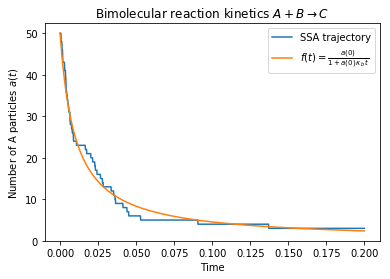

In [49]:
desired_time = 0.2
end_time_step = int(desired_time / (times[-1] / float(len(times)))) if times[-1] > desired_time else len(times)-1
plt.plot(times[:end_time_step], traj[:end_time_step,0,0], label="SSA trajectory")
plot(
    lambda x: init_state[0,0] / (1. + (init_state[0,0] * rate * x)),
    np.linspace(0.,times[end_time_step], 1000),
    label=r"$f(t) = \frac{a(0)}{1 + a(0)\, \kappa_b\, t}$"
)
plt.ylabel(r"Number of A particles $a(t)$")
plt.xlabel(r"Time")
plt.legend(loc="best")
plt.title(r"Bimolecular reaction kinetics $A+B\rightarrow C$")
plt.show()